# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Samuel Matthew Batistuta]
- **Email:** [samuellnababan20@gmail.com]
- **ID Dicoding:** [samuellnababan]

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan musim memengaruhi kebiasaan orang dalam menggunakan sepeda?
- Apakah kondisi cuaca seperti suhu, kelembaban, atau kecepatan angin berpengaruh terhadap seberapa banyak orang menggunakan sepeda?

## Import Semua Packages/Library yang Digunakan

In [41]:
pip install -r requirements.txt

In [42]:
#import package yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [43]:
day_df = pd.read_csv("/content/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data berhasil dikumpulkan dari 2 file CSV yang berbeda yaitu day dan hour

### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dari hasil informasi di atas, kita bisa melihat data apa yang perlu dibersihkan, seperti mengatasi missing values atau mengubah tipe data yang tidak sesuai.

### Cleaning Data

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Melakukan pendeteksian dan mengukur tingkat kelengkapan data dalam analisis data

## Exploratory Data Analysis (EDA)

### Explore ...

Explore Tabel day_df

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
175,176,2011-06-25,3,0,6,0,6,0,1,0.695000,0.643313,0.483333,0.209571,1782,3420,5202
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999
387,388,2012-01-23,1,1,1,0,1,1,2,0.218333,0.243058,0.911250,0.110708,145,2287,2432
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627
465,466,2012-04-10,2,1,4,0,2,1,1,0.446667,0.436233,0.435000,0.249375,819,5099,5918


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


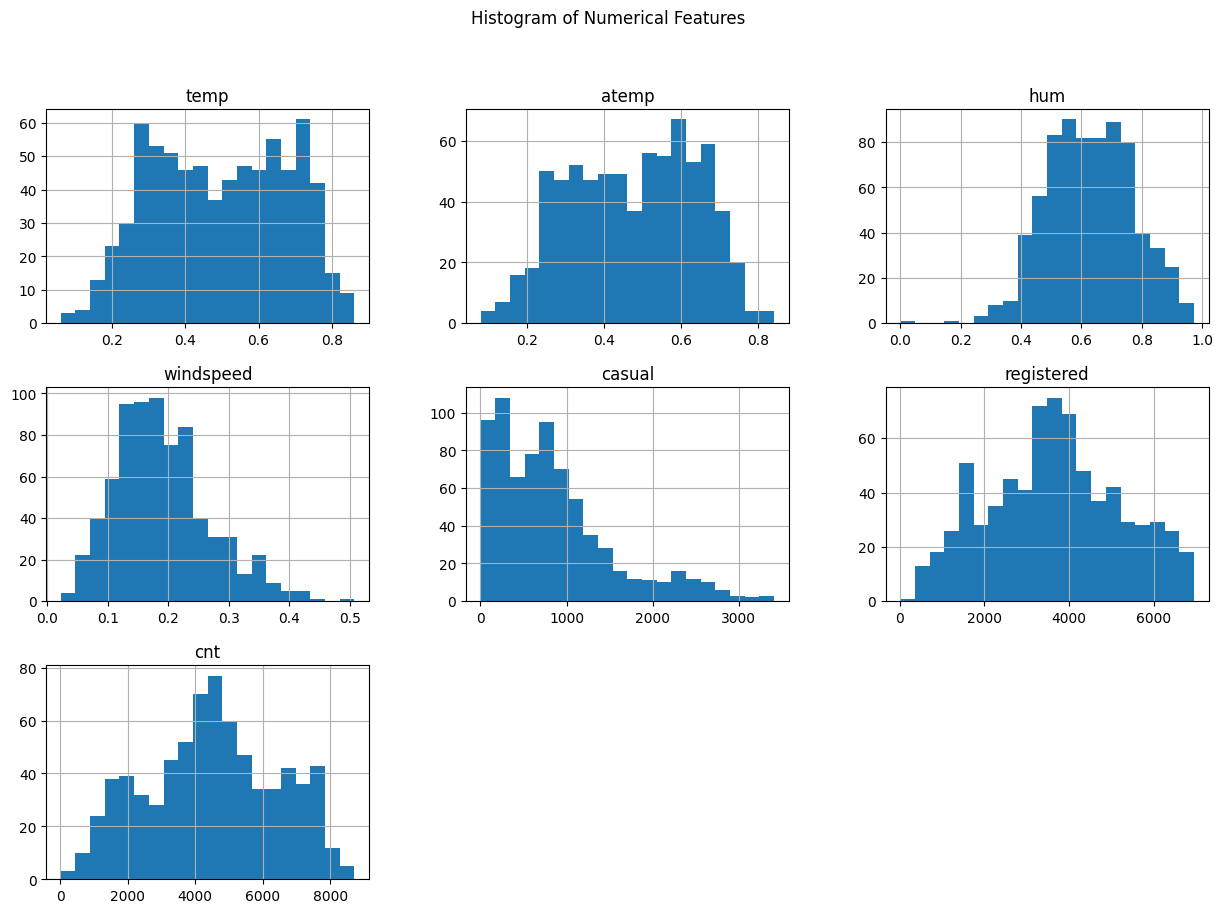

In [ ]:
# Visualisasi Distribusi Data
# Histogram Untuk Variabel Numerik

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
day_df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

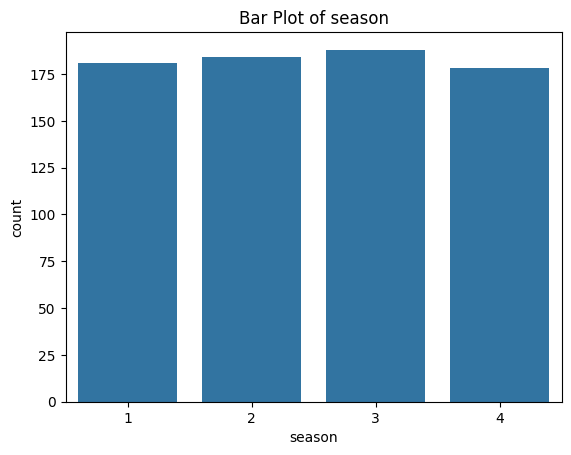

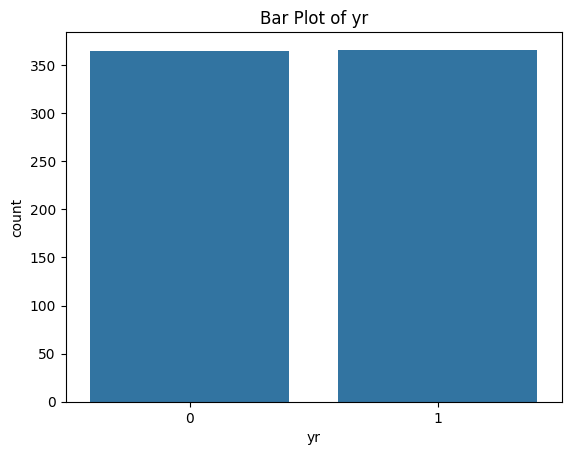

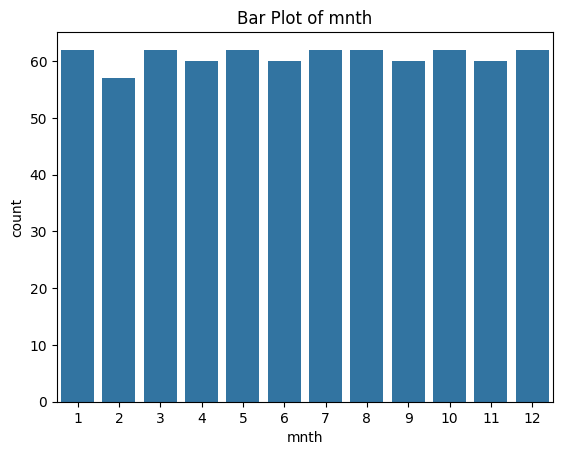

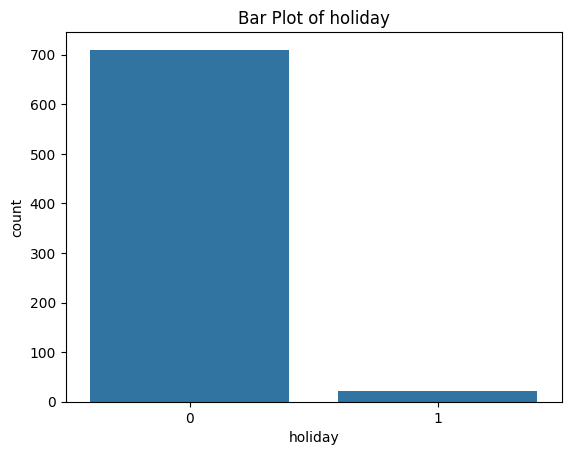

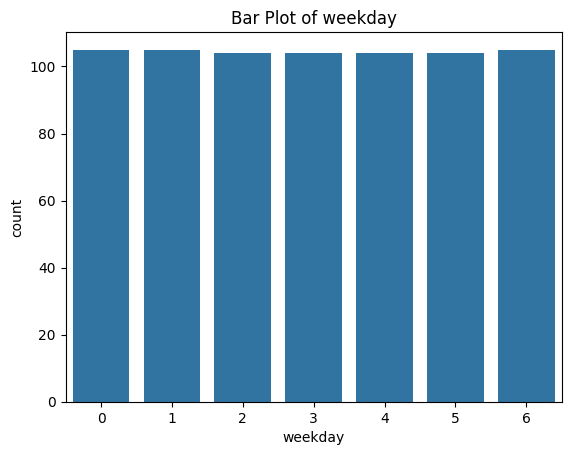

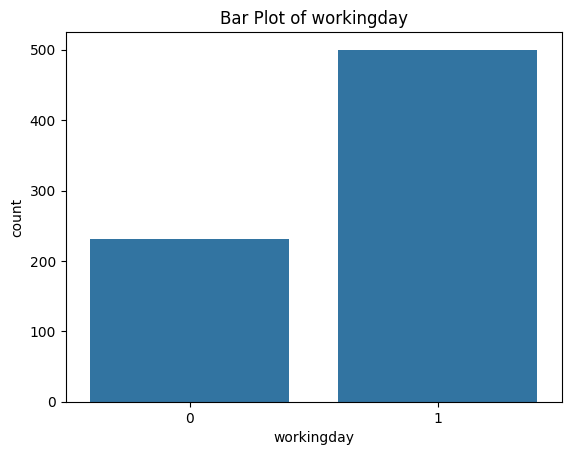

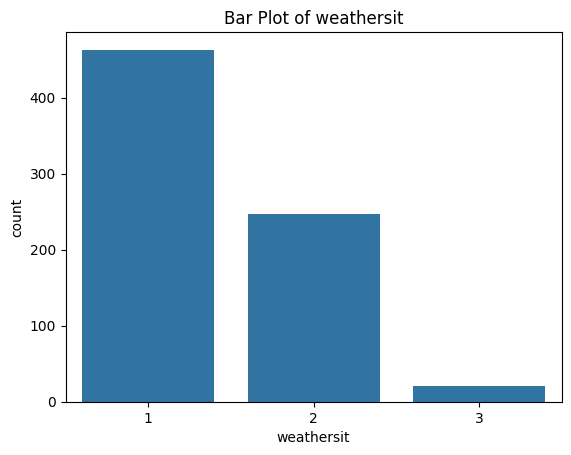

In [ ]:
# Bar Plot Untuk Variabel Kategorikal

categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
    sns.countplot(x=feature, data=day_df)
    plt.title(f'Bar Plot of {feature}')
    plt.show()

In [ ]:
# Menghapus Kolom 'dteday' sebelum menghitung korelasi

day_df_numeric = day_df.drop(columns=['dteday'])

In [ ]:
# Menghitung Korelasi Antar Variabel Numerik

correlation = day_df_numeric.corr()

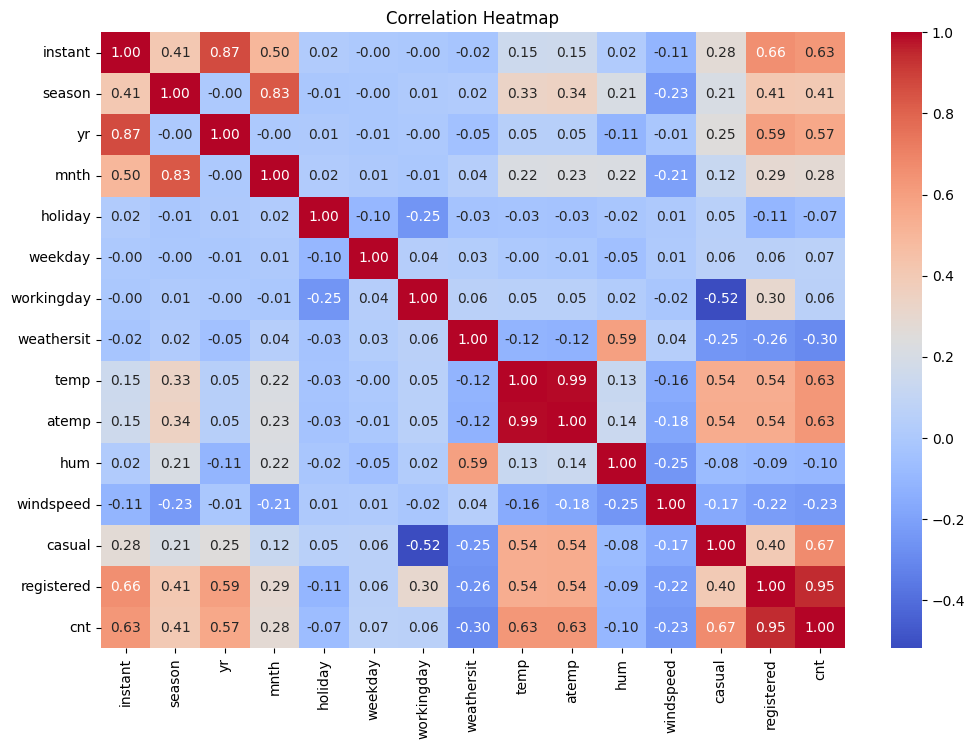

In [ ]:
# Plot Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Explore Tabel hour_df

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9000,9001,2012-01-15,1,1,1,21,0,0,0,1,0.16,0.1667,0.40,0.1642,1,71,72
3879,3880,2011-06-15,2,0,6,13,0,3,1,1,0.74,0.6515,0.28,0.2836,43,146,189
15140,15141,2012-09-28,4,1,9,1,0,5,1,3,0.60,0.5455,0.88,0.0000,0,13,13
11660,11661,2012-05-06,2,1,5,1,0,0,0,2,0.54,0.5152,0.83,0.2239,37,84,121
2041,2042,2011-03-30,2,0,3,22,0,3,1,3,0.24,0.2273,0.93,0.2239,3,21,24


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


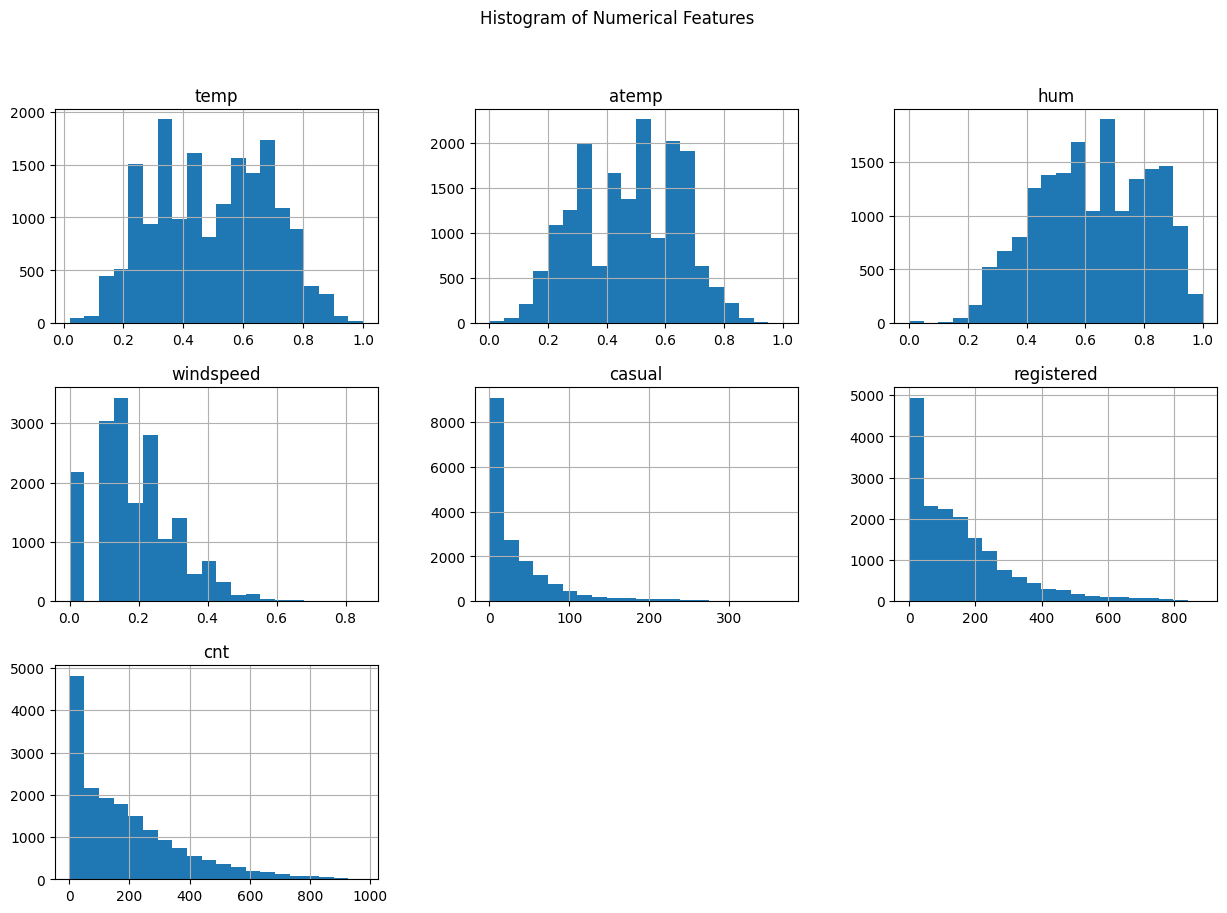

In [ ]:
# Analisis Distribusi Data

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
hour_df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

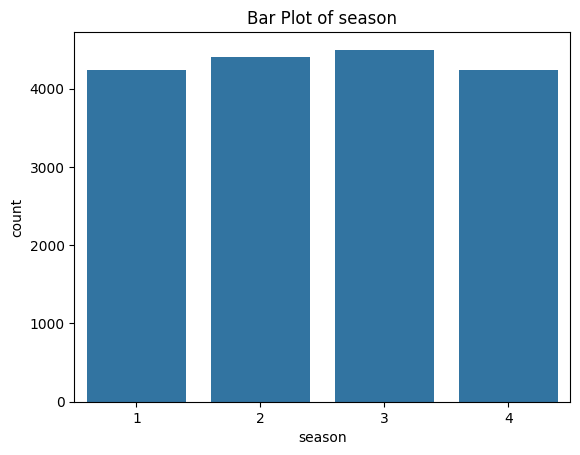

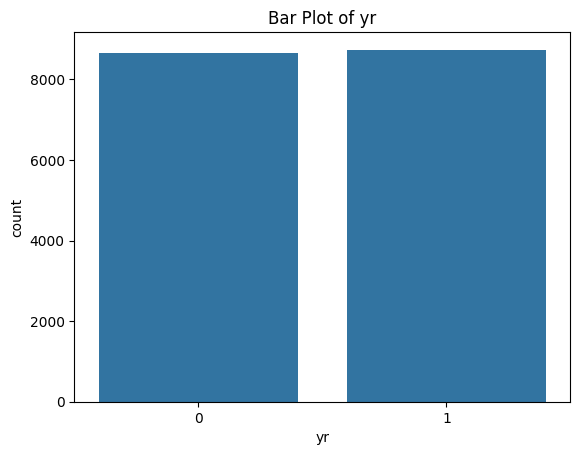

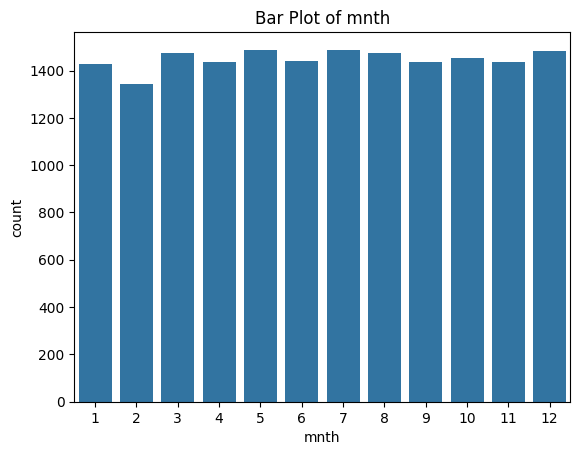

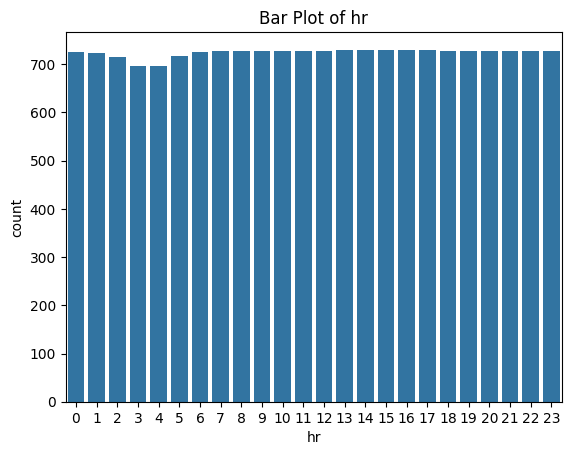

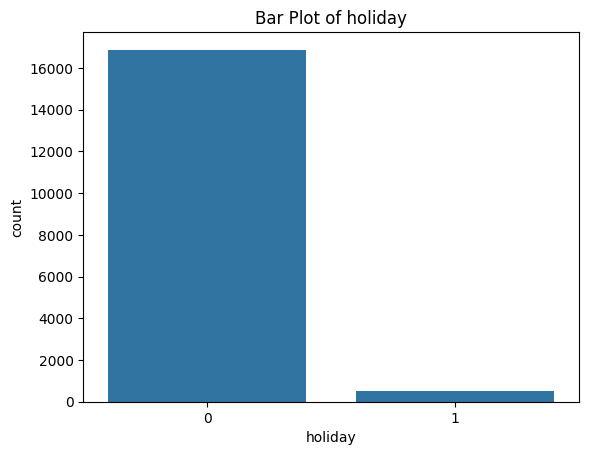

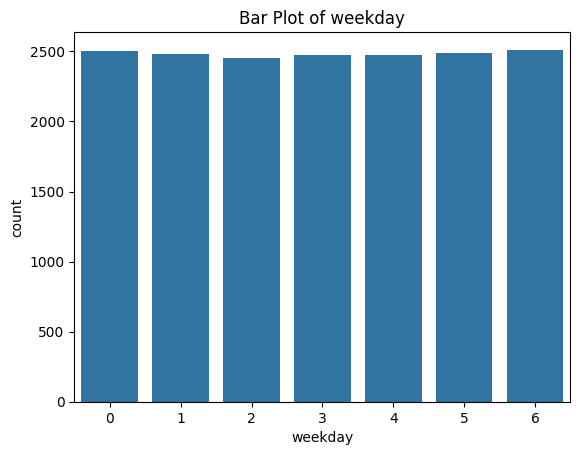

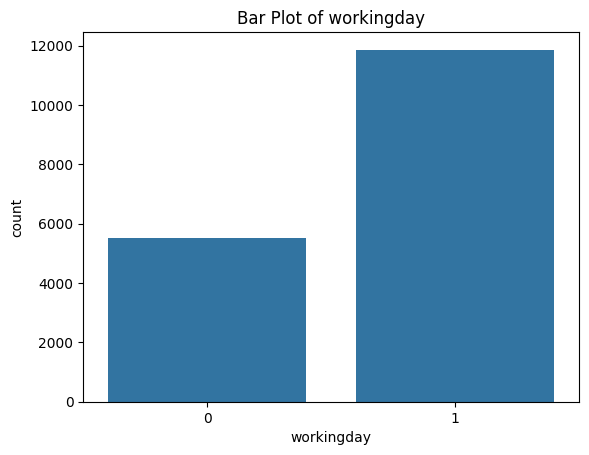

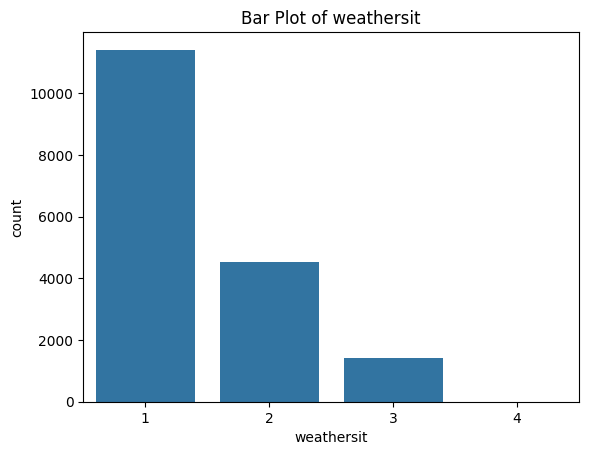

In [ ]:
# Bar Plot Untuk Variabel Kategorikal

categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
    sns.countplot(x=feature, data=hour_df)
    plt.title(f'Bar Plot of {feature}')
    plt.show()

In [ ]:
# Menghapus Kolom 'dteday' Sebelum Menghitung Korelasi

hour_df_numeric = hour_df.drop(columns=['dteday'])

In [ ]:
# Menghitung Korelasi

correlation = hour_df_numeric.corr()

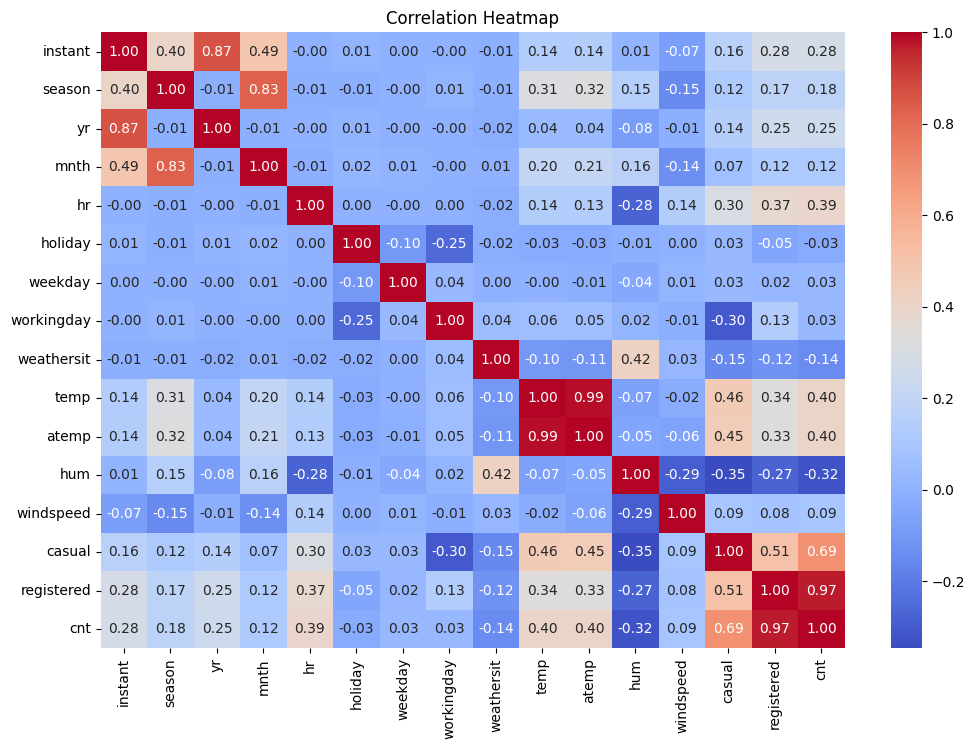

In [ ]:
# Plot Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

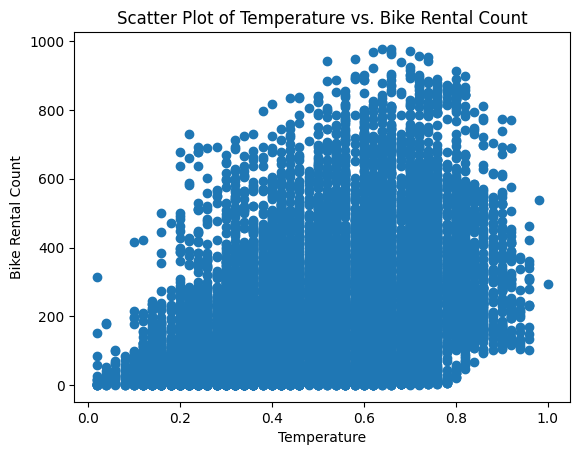

In [ ]:
# Analisis Hubungan Antara Variabel
# Scatter Plot Antara Variabel Numerik 'temp' dan 'cnt'

plt.scatter(hour_df['temp'], hour_df['cnt'])
plt.title('Scatter Plot of Temperature vs. Bike Rental Count')
plt.xlabel('Temperature')
plt.ylabel('Bike Rental Count')
plt.show()

Explore All Data (day_df dan hour_df)

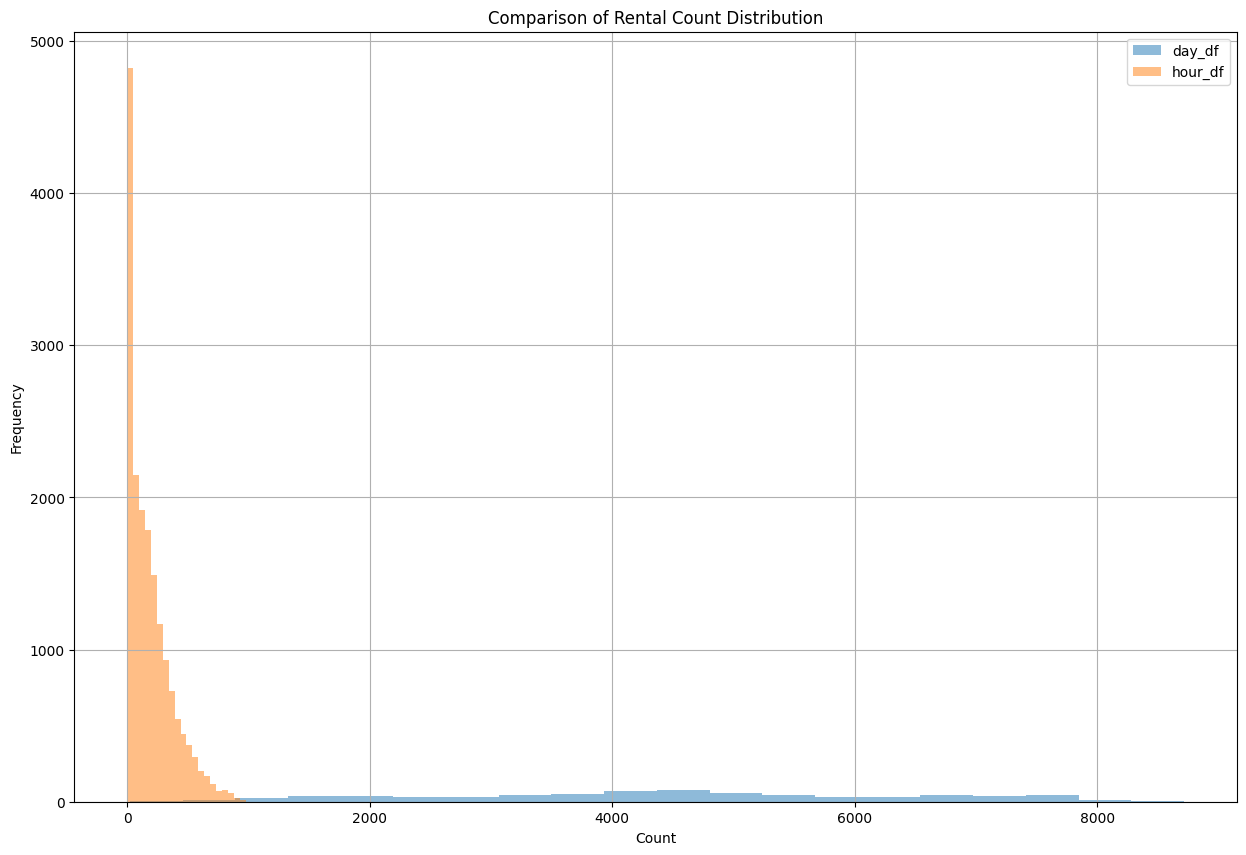

In [ ]:
# Membandingkan Distribusi Variabel Antara day_df dan hour_df

plt.figure(figsize=(15, 10))
day_df['cnt'].hist(alpha=0.5, label='day_df', bins=20)
hour_df['cnt'].hist(alpha=0.5, label='hour_df', bins=20)
plt.title('Comparison of Rental Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Menganalisis Korelasi Antara Variabel Yang Sama Dari Kedua Tabel

correlation_day = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
correlation_hour = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

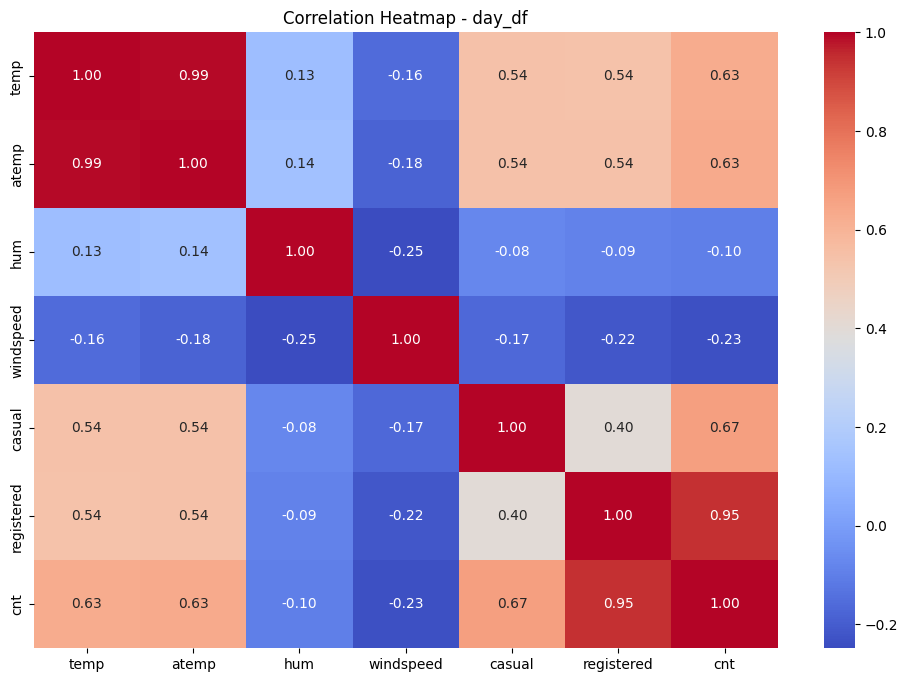

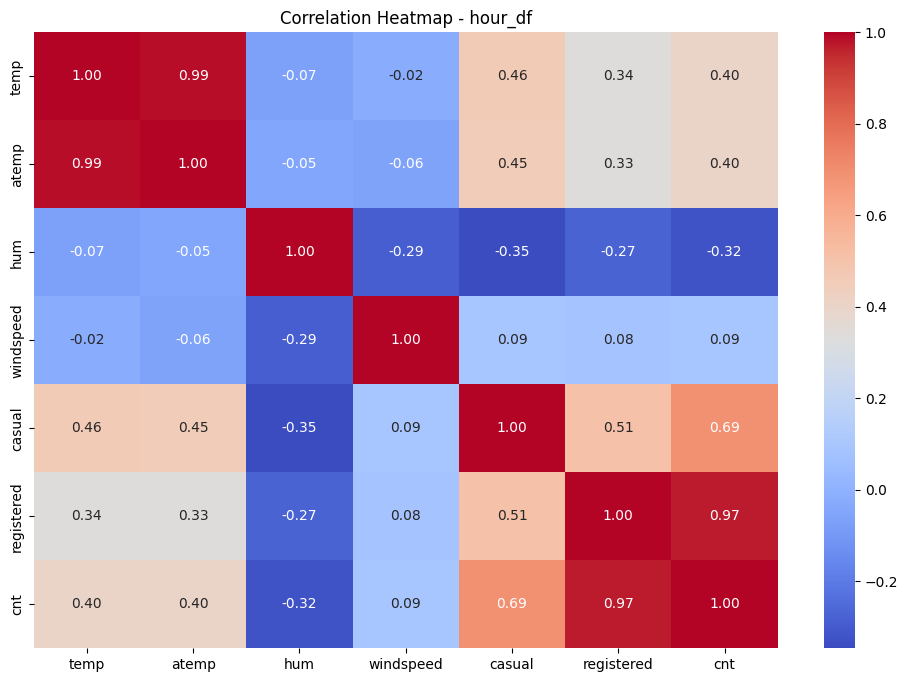

In [ ]:
# Visualisasi Heatmap Korelasi

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_day, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - day_df')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_hour, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - hour_df')
plt.show()

In [ ]:
## Menggabungkan day_df dan hour_df Berdasarkan Kolom 'dteday'

all_df = pd.merge(left=day_df, right=hour_df, how="inner", on="dteday")

In [ ]:
# Menyimpan Gabungan Data Menjadi File CSV

all_df.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

In [ ]:
all_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
17171,723,2012-12-23,1,1,12,0,0,0,1,0.245833,...,0,0,1,0.16,0.1970,0.64,0.0896,4,5,9
8984,380,2012-01-15,1,1,1,0,0,0,1,0.166667,...,0,0,2,0.16,0.1364,0.47,0.3284,0,5,5
13384,563,2012-07-16,3,1,7,0,1,1,1,0.763333,...,1,1,1,0.76,0.7273,0.66,0.1343,45,283,328
1330,59,2011-02-28,1,0,2,0,1,1,2,0.407273,...,1,1,3,0.40,0.4091,1.00,0.2985,2,77,79
15983,673,2012-11-03,4,1,11,0,6,0,2,0.343333,...,6,0,2,0.36,0.3333,0.46,0.3284,108,292,400


### Pertanyaan 1: Bagaimana perubahan musim memengaruhi kebiasaan orang dalam menggunakan sepeda?

In [ ]:
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Menentukan Grup Data Berdasarkan Musim

seasonal_data = all_df.groupby('season_x').count()

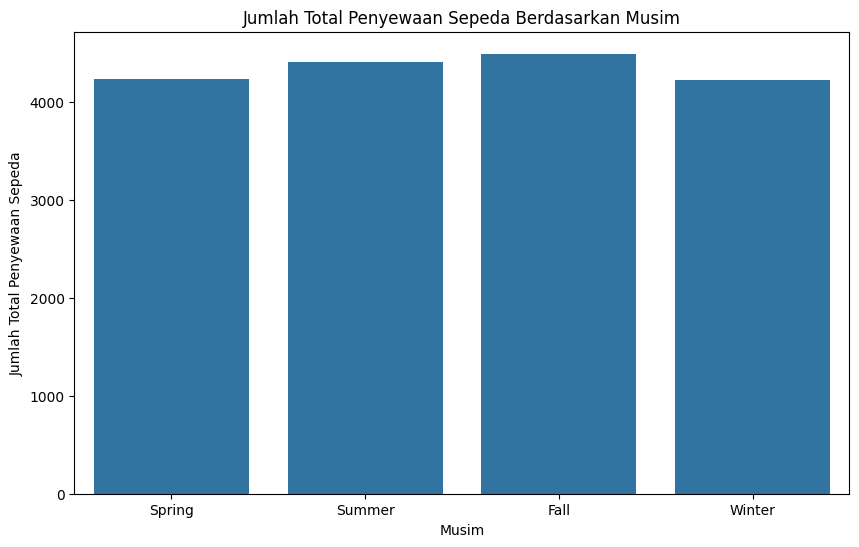

In [ ]:
# Visualisasi Data

# Visualisasikan data
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_data.index, y=seasonal_data['cnt_y'])
plt.title('Jumlah Total Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 2: Apakah kondisi cuaca seperti suhu, kelembaban, atau kecepatan angin berpengaruh terhadap seberapa banyak orang menggunakan sepeda?

In [ ]:
print(all_df.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


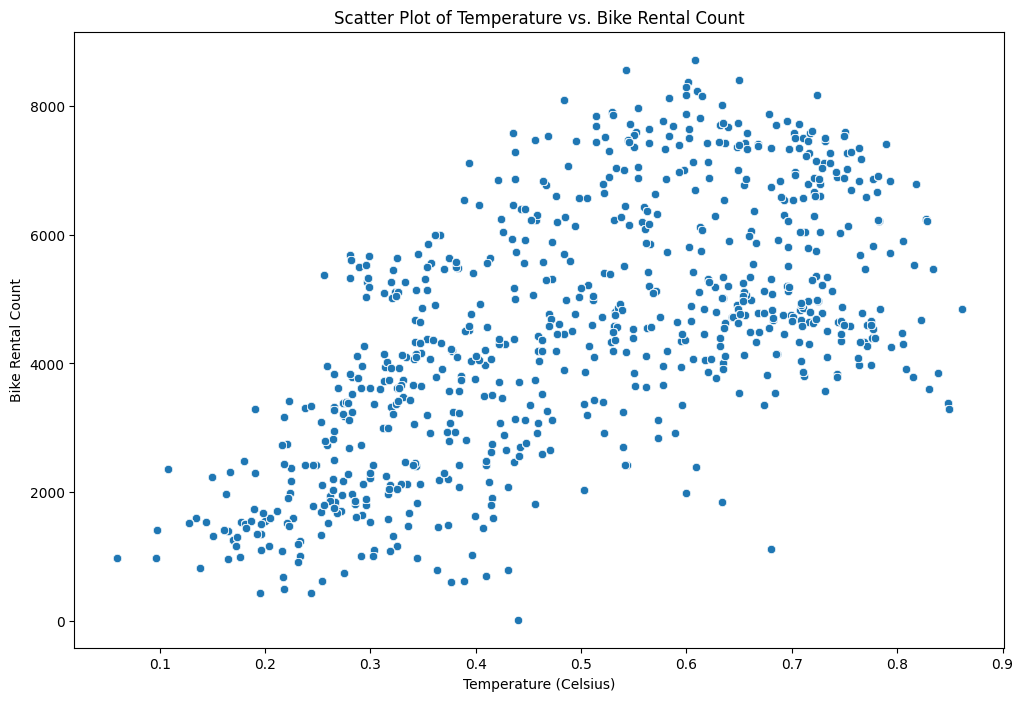

In [ ]:
# Scatter plot untuk variabel cuaca dengan jumlah penggunaan sepeda
# Berdasrkan Temperature

plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp_x', y='cnt_x', data=all_df)
plt.title('Scatter Plot of Temperature vs. Bike Rental Count')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Rental Count')
plt.show()

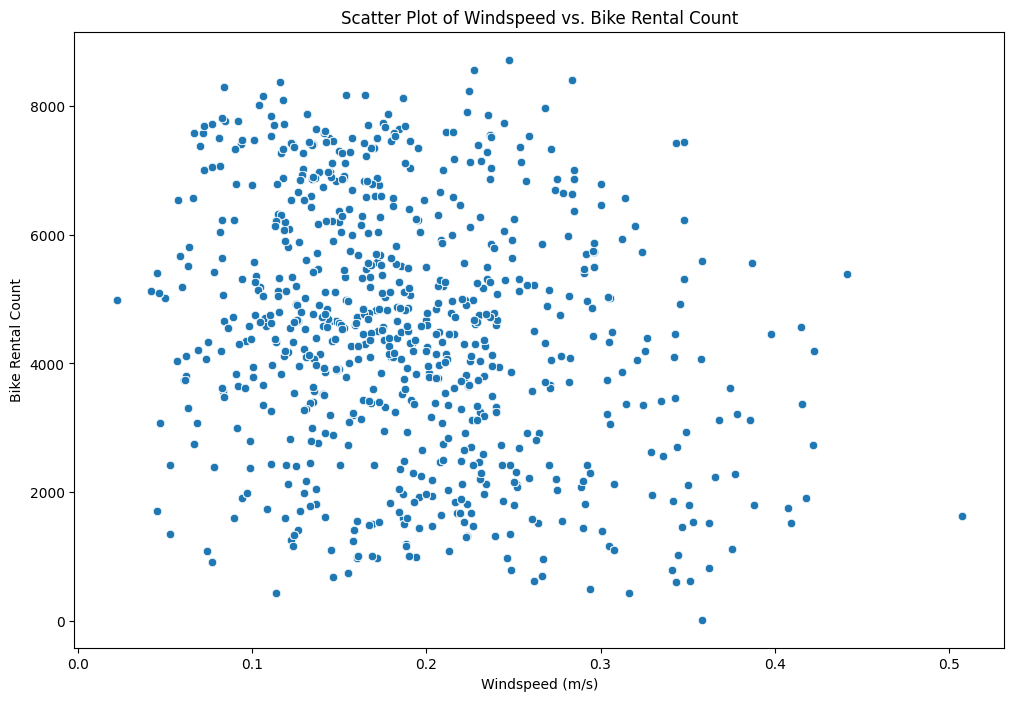

In [ ]:
# Berdasarkan Kecepatan Angin

plt.figure(figsize=(12, 8))
sns.scatterplot(x='windspeed_x', y='cnt_x', data=all_df)
plt.title('Scatter Plot of Windspeed vs. Bike Rental Count')
plt.xlabel('Windspeed (m/s)')
plt.ylabel('Bike Rental Count')
plt.show()

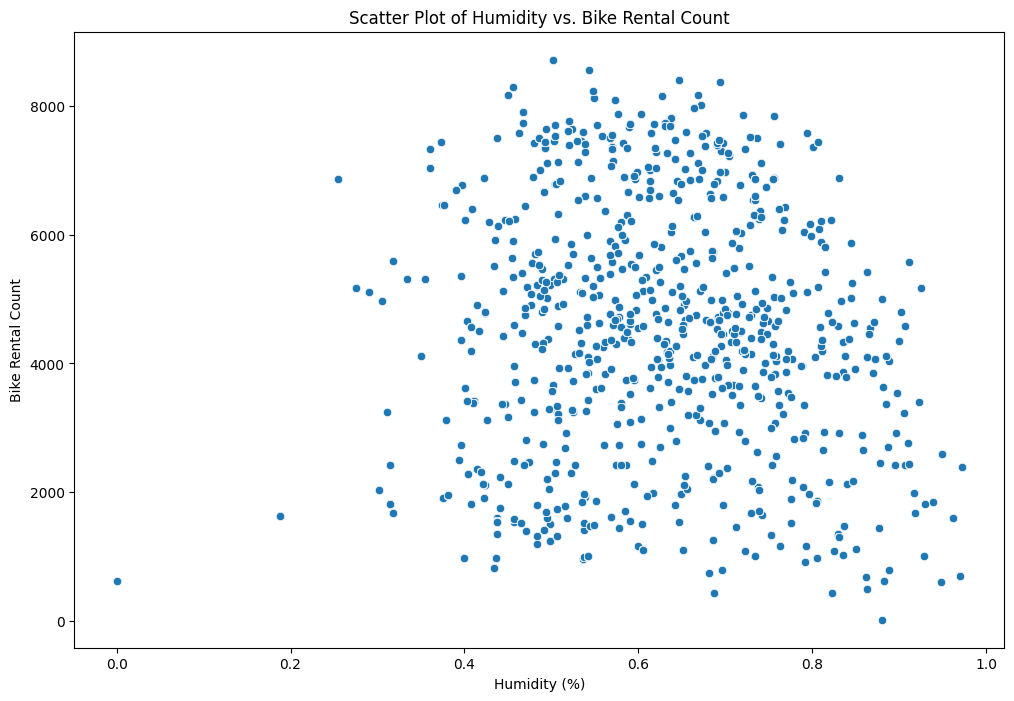

In [ ]:
# Berdasarkan Kelembaban Udara

plt.figure(figsize=(12, 8))
sns.scatterplot(x='hum_x', y='cnt_x', data=all_df)
plt.title('Scatter Plot of Humidity vs. Bike Rental Count')
plt.xlabel('Humidity (%)')
plt.ylabel('Bike Rental Count')
plt.show()

In [ ]:
# Analisis Korelasi

correlation_weather = all_df[['temp_x', 'hum_x', 'windspeed_x', 'cnt_x', 'temp_y', 'hum_y', 'windspeed_y', 'cnt_x']].corr()

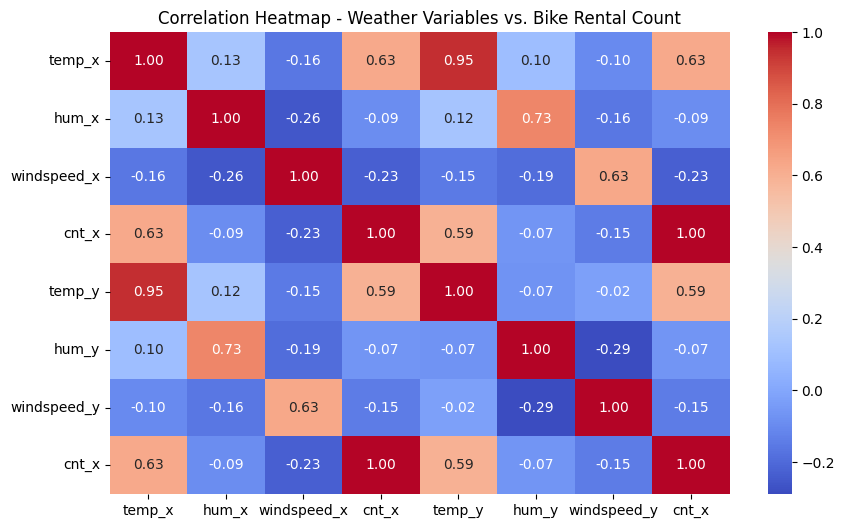

In [ ]:
# Visualisasi Heatmap Korelasi

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_weather, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Weather Variables vs. Bike Rental Count')
plt.show()

## Conclusion

- Conclution pertanyaan 1
Dari hasil analisis, terlihat bahwa penggunaan sepeda meningkat selama musim semi dan musim panas, namun menurun saat musim gugur dan musim dingin. Pengguna sepeda juga lebih banyak pada hari kerja dibandingkan dengan hari libur. Selain itu, ada tren peningkatan jumlah pengguna sepeda dari tahun ke tahun. Analisis lebih mendalam bisa dilakukan dengan melihat pola penggunaan harian serta mempertimbangkan faktor lain seperti kondisi cuaca.


- Conclution pertanyaan 2
Berdasarkan visualisasi scatter plot dan analisis korelasi, ditemukan bahwa ada hubungan yang jelas antara suhu dan jumlah penggunaan sepeda. Semakin tinggi suhu, semakin banyak orang yang menggunakan sepeda. Namun, tidak ada hubungan signifikan antara kelembaban dan kecepatan angin dengan jumlah pengguna sepeda. Scatter plot menunjukkan bahwa tidak ada pola yang jelas atau korelasi antara kedua variabel tersebut. Jadi, dapat disimpulkan bahwa suhu memiliki pengaruh yang cukup besar terhadap penggunaan sepeda, sedangkan kelembaban dan kecepatan angin tidak terlalu berpengaruh.